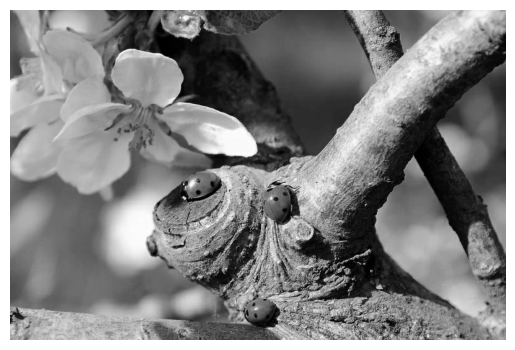

In [11]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

# Załadowanie obrazu
A = imread('6.webp')
X = np.mean(A,-1) # convert RGB to grayscale

# Pokazanie obrazu
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

(533,)


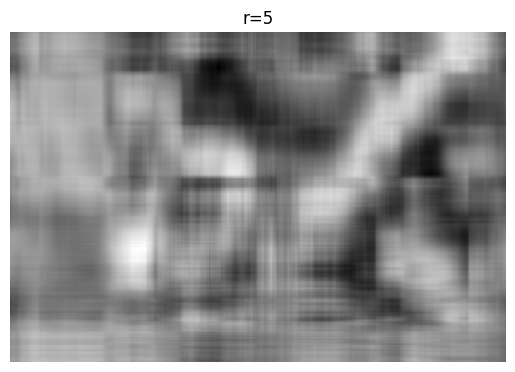

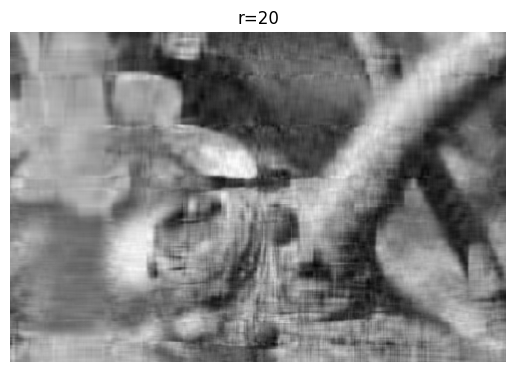

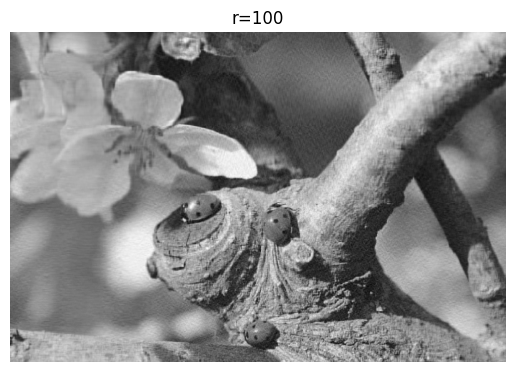

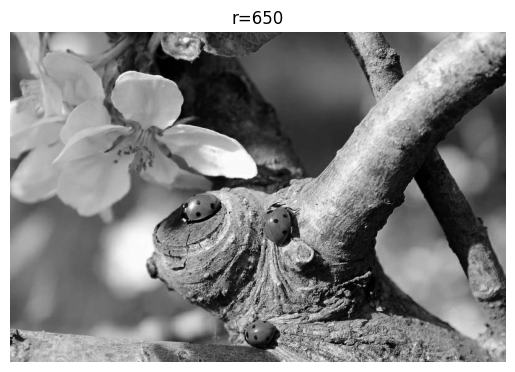

In [12]:
# SVD - zgodnie z instrukcją laboratoryjną (wstęp)
U, S, VT = np.linalg.svd(X,full_matrices=False)
print(S.shape)
S = np.diag(S)

j=0
for r in (5,20,100,650):
    Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r='+str(r))
    plt.show()

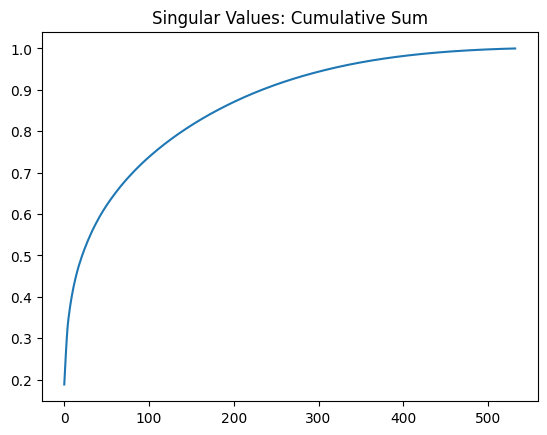

In [13]:
plt.figure(1)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

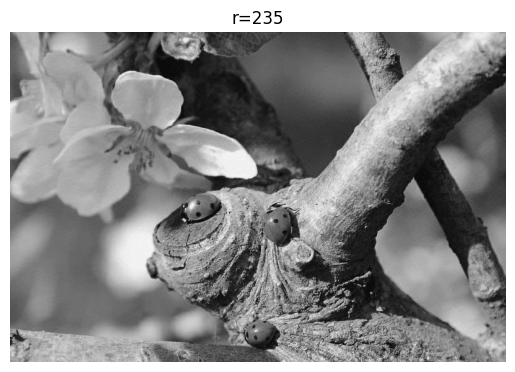

Dla r = 235 uzyskano 90.07554125658388% informacji (pierwsza wartość powyżej 90%).


In [14]:
# Przeprowadzenie dokładnej analizy w celu zobaczenia, dla jakiej wartości uzyskamy 90%.
# Weźmy zawężony przedział <200; 400> - na podstawie wykresu wyżej

U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

bestR = 200
bestX = None
bestInfo = 0
for r in range(200, 400):
    # Obraz dla tego r
    Xapprox = U[:,:r]@S[0:r,:r]@VT[:r,:]
    bestR += 1
    
    # Sprawdamy jaki jest %
    percentage = (np.cumsum(np.diag(S))/np.sum(np.diag(S)))[r]
    if percentage > 0.90:
        bestInfo = percentage
        bestX = Xapprox
        break
    
plt.figure(1)
img = plt.imshow(bestX)
img.set_cmap('gray')
plt.axis('off')
plt.title('r='+str(bestR))
plt.show()
print("Dla r = " + str(bestR) + " uzyskano " + str(bestInfo * 100) + "% informacji (pierwsza wartość powyżej 90%).")